### Basic imports

for my inspiration see https://www.kaggle.com/maxbrain/a-complete-machine-learning-project-walk-through/data and https://github.com/ageron/handson-ml2

In [1]:
import numpy as np
import pandas as pd 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
CLEAREDDATA_PATH = os.path.join(PROJECT_ROOT_DIR, "cleareddata")
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(CLEAREDDATA_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

./data/scotch_review.csv
./data/nyc_benchmarking_disclosure_2017_consumption_data.xlsx


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/opt/conda/lib/python3.7/site-packages/tqdm/std.py:654: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


### Get data and first insights

In [2]:
data = pd.read_excel(PROJECT_ROOT_DIR+'/data/nyc_benchmarking_disclosure_2017_consumption_data.xlsx','Information and Metrics')
# See the column data types and non-missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
Order                                                         34355 non-null int64
Property Id                                                   34355 non-null int64
Property Name                                                 34355 non-null object
Parent Property Id                                            1723 non-null object
Parent Property Name                                          1723 non-null object
BBL - 10 digits                                               33625 non-null float64
NYC Borough, Block and Lot (BBL) self-reported                33626 non-null object
NYC Building Identification Number (BIN)                      33123 non-null object
Address 1 (self-reported)                                     34355 non-null object
Address 2 (self-reported)                                     427 non-null object
Postal Code                                            

In [3]:
data.head(10)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found
5,7,2920468,Union Temple,NaN,NaN,3.011720e+09,3-01172-0006,3259310,17 Eastern Parkway,NaN,...,NaN,NaT,224.5,157.6,67.0,1380.0,18.87,Not found,2018-02-14,Not found
6,8,2645118,155 West 66th Street Condominium,NaN,NaN,1.011388e+09,1011387503,1028838,155 West 66th Street,NaN,...,NaN,NaT,1254.6,101.0,1153.6,2641.6,18.59,Not found,2018-02-15,Not found
7,9,4376215,38-20 Bowne Street Flushing,NaN,NaN,4.050200e+09,4-05020-0023,4113595,38-20 Bowne Street,NaN,...,NaN,NaT,926.2,0.0,926.2,18570.4,95.74,Not found,2018-02-15,Not found
8,10,2815759,Queens- Queen Grand Realty,NaN,NaN,4.026110e+09,4026110106,4059001,4710 Grand Ave,NaN,...,NaN,NaT,636.3,172.3,464.1,1003.2,5.02,Not found,2018-02-15,Not found
9,11,3216420,989 East 149th,"6224246, 6224246","955/989, 955/989",2.026040e+09,2026040500,2101594,989 E 149th Street,NaN,...,NaN,NaT,67.9,67.9,0.0,521.6,3.48,Not found,2018-02-15,Not found


In [4]:
data = data.replace({'Not Available': np.nan})

In [5]:
data.describe()

,Order,Property Id,BBL - 10 digits,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,...,Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²)
count,34355.000000,3.435500e+04,3.362500e+04,3.435500e+04,3.432300e+04,7226.000000,2450.000000,34355.000000,34355.000000,34355.000000,...,2.804700e+04,3.157600e+04,3.157600e+04,3.101300e+04,2.383000e+03,3.295700e+04,3.311600e+04,3.308800e+04,1.828000e+04,1.827100e+04
mean,17355.145103,4.710374e+06,2.249470e+09,1.149392e+05,1.115422e+05,20136.231746,11179.502776,1946.106855,1.196565,98.393101,...,3.576895e+05,3.833599e+06,1.123563e+06,1.126104e+06,2.635069e+03,1.893548e+04,1.665273e+03,1.719766e+04,9.964984e+03,5.869470e+02
std,10016.661222,1.676669e+06,1.193104e+09,2.164591e+05,2.108989e+05,51022.113092,24105.730990,32.725881,2.959191,8.917131,...,3.329299e+07,1.249719e+07,3.662716e+06,3.674892e+06,5.617472e+04,2.954070e+06,1.621715e+05,2.943758e+06,9.190300e+04,5.251308e+04
min,1.000000,7.365000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,1051.000000,0.000000,0.000000,...,0.000000e+00,-6.343300e+03,-1.859100e+03,-1.859100e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.760050e+04,0.000000e+00,0.000000e+00
25%,8666.500000,2.825644e+06,1.014980e+09,4.227300e+04,4.175000e+04,3500.000000,1899.000000,1925.000000,1.000000,100.000000,...,8.581150e+03,6.888429e+05,2.018883e+05,2.022287e+05,4.560000e+01,1.841000e+02,6.040000e+01,5.380000e+01,1.954200e+03,2.847000e+01
50%,17383.000000,4.897531e+06,2.032480e+09,6.582000e+04,6.438100e+04,8000.000000,5000.000000,1935.000000,1.000000,100.000000,...,3.226560e+04,1.249026e+06,3.660686e+05,3.673331e+05,1.760000e+02,3.283000e+02,1.888000e+02,1.024000e+02,3.794200e+03,5.003000e+01
75%,26028.500000,6.297280e+06,3.058740e+09,1.136150e+05,1.116050e+05,16326.250000,11200.000000,1965.000000,1.000000,100.000000,...,5.846190e+04,2.828563e+06,8.290043e+05,8.342771e+05,3.080000e+02,5.962000e+02,3.313000e+02,2.387250e+02,6.631100e+03,8.339500e+01
max,34686.000000,6.716654e+06,7.000500e+09,1.507766e+07,1.507766e+07,992059.400000,591640.000000,2021.000000,161.000000,100.000000,...,3.936197e+09,5.742834e+08,1.683128e+08,1.676955e+08,2.553601e+06,5.354297e+08,2.083388e+07,5.354297e+08,5.446590e+06,6.913227e+06


### data manipulation

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values
Propane Use (kBtu),34354,100.0
District Hot Water Use (kBtu),34347,100.0
District Chilled Water Use (kBtu),34325,99.9
Fuel Oil #1 Use (kBtu),34319,99.9
Diesel #2 Use (kBtu),34285,99.8
Address 2 (self-reported),33928,98.8
Fuel Oil #5 & 6 Use (kBtu),33871,98.6
District Steam Use (kBtu),32787,95.4
Parent Property Name,32632,95.0
Parent Property Id,32632,95.0


In [8]:
rem_perc = 50
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > rem_perc].index)
print('By the remove percentage criterion %d, we may remove %d columns.' % (rem_perc, len(missing_columns)))

Your selected dataframe has 60 columns.
There are 43 columns that have missing values.
By the remove percentage criterion 50, we may remove 19 columns.


In [9]:
data = data.drop(columns = list(missing_columns))

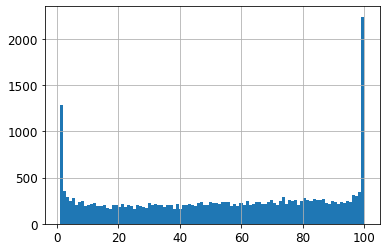

In [10]:
star="ENERGY STAR Score"
data[star].hist(bins=100)

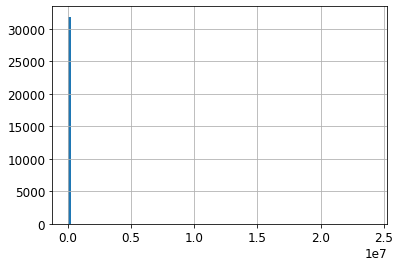

In [11]:
data['Site EUI (kBtu/ft²)'].hist(bins=100)

thats bad, there are clear outliers

In [12]:
data['Site EUI (kBtu/ft²)'].describe()

count    3.188800e+04
mean     9.922633e+02
std      1.349948e+05
min      0.000000e+00
25%      5.800000e+01
50%      7.990000e+01
75%      1.034000e+02
max      2.405806e+07
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
# Interquartile range
iqr = data['Site EUI (kBtu/ft²)'].describe()['75%'] - data['Site EUI (kBtu/ft²)'].describe()['25%']

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (data['Site EUI (kBtu/ft²)'].describe()['25%'] - 2 * iqr))]

data = data[(data['Site EUI (kBtu/ft²)'] < (data['Site EUI (kBtu/ft²)'].describe()['75%'] + 2 * iqr))]

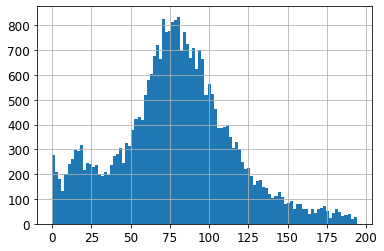

In [14]:
data['Site EUI (kBtu/ft²)'].hist(bins=100)

In [15]:
# Create a list of buildings with more than 50 measurements
types = data.dropna(subset=[star])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 50].index)

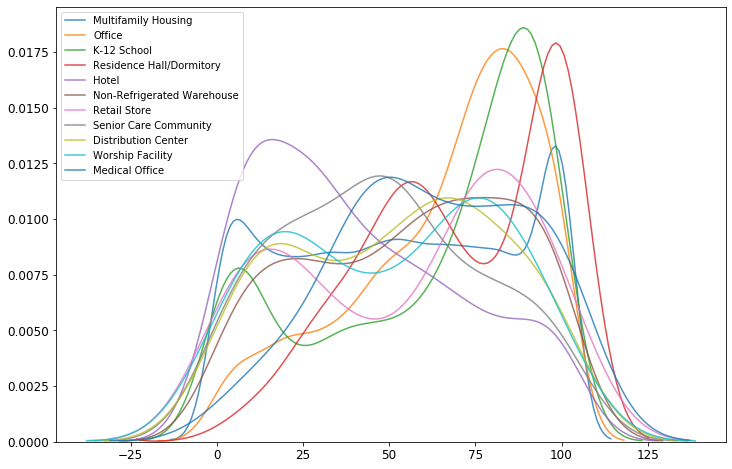

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset[star].dropna(), ax=ax,
               label = b_type, shade = False, alpha = 0.8);

In [17]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == star:
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = [star])

# Find correlations with the score 
correlations = features.corr()[star].dropna().sort_values()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/

In [18]:
correlations.head(15)

Site EUI (kBtu/ft²)                                               -0.776217
Weather Normalized Site EUI (kBtu/ft²)                            -0.769150
sqrt_Site EUI (kBtu/ft²)                                          -0.753172
sqrt_Weather Normalized Site EUI (kBtu/ft²)                       -0.746099
sqrt_Weather Normalized Source EUI (kBtu/ft²)                     -0.719965
sqrt_Source EUI (kBtu/ft²)                                        -0.713372
Weather Normalized Source EUI (kBtu/ft²)                          -0.697745
Source EUI (kBtu/ft²)                                             -0.686395
log_Site EUI (kBtu/ft²)                                           -0.657516
log_Weather Normalized Site EUI (kBtu/ft²)                        -0.650361
log_Weather Normalized Source EUI (kBtu/ft²)                      -0.644238
log_Source EUI (kBtu/ft²)                                         -0.643364
Weather Normalized Site Natural Gas Intensity (therms/ft²)        -0.471598
sqrt_Weather

In [19]:
correlations.tail(15)

log_BBL - 10 digits                                                0.038343
Largest Property Use Type_Hospital (General Medical & Surgical)    0.046121
sqrt_BBL - 10 digits                                               0.050555
BBL - 10 digits                                                    0.055700
Largest Property Use Type_K-12 School                              0.058145
Largest Property Use Type_Residence Hall/Dormitory                 0.066231
Borough_Brooklyn                                                   0.066358
Self-Reported Gross Floor Area (ft²)                               0.066913
Largest Property Use Type - Gross Floor Area (ft²)                 0.069284
sqrt_Self-Reported Gross Floor Area (ft²)                          0.104337
Largest Property Use Type_Office                                   0.106708
sqrt_Largest Property Use Type - Gross Floor Area (ft²)            0.108239
log_Self-Reported Gross Floor Area (ft²)                           0.131693
log_Largest 

Site EUI (kBtu/ft²) is the best correlation to our prediction parameter star="ENERGY STAR Score". Go ahead and explore more...

In [20]:
features.keys()

Index(['Order', 'Property Id', 'BBL - 10 digits',
       'Self-Reported Gross Floor Area (ft²)',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'ENERGY STAR Score',
       'Source EUI (kBtu/ft²)',
       ...
       'Largest Property Use Type_Stadium (Open)',
       'Largest Property Use Type_Strip Mall',
       'Largest Property Use Type_Supermarket/Grocery Store',
       'Largest Property Use Type_Transportation Terminal/Station',
       'Largest Property Use Type_Urgent Care/Clinic/Other Outpatient',
       'Largest Property Use Type_Vocational School',
       'Largest Property Use Type_Wastewater Treatment Plant',
       'Largest Property Use Type_Wholesale Club/Supercenter',
       'Largest Property Use Type_Worship Facility',
       'Largest Property Use Type_Zoo'],
      dtype='object', length=148)

In [21]:
#from pandas.plotting import scatter_matrix

#attributes = ["Site EUI (kBtu/ft²)", "Weather Normalized Site EUI (kBtu/ft²)", "Source EUI (kBtu/ft²)",
#              "Self-Reported Gross Floor Area (ft²)"]
#scatter_matrix(features[attributes], figsize=(12, 8))

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


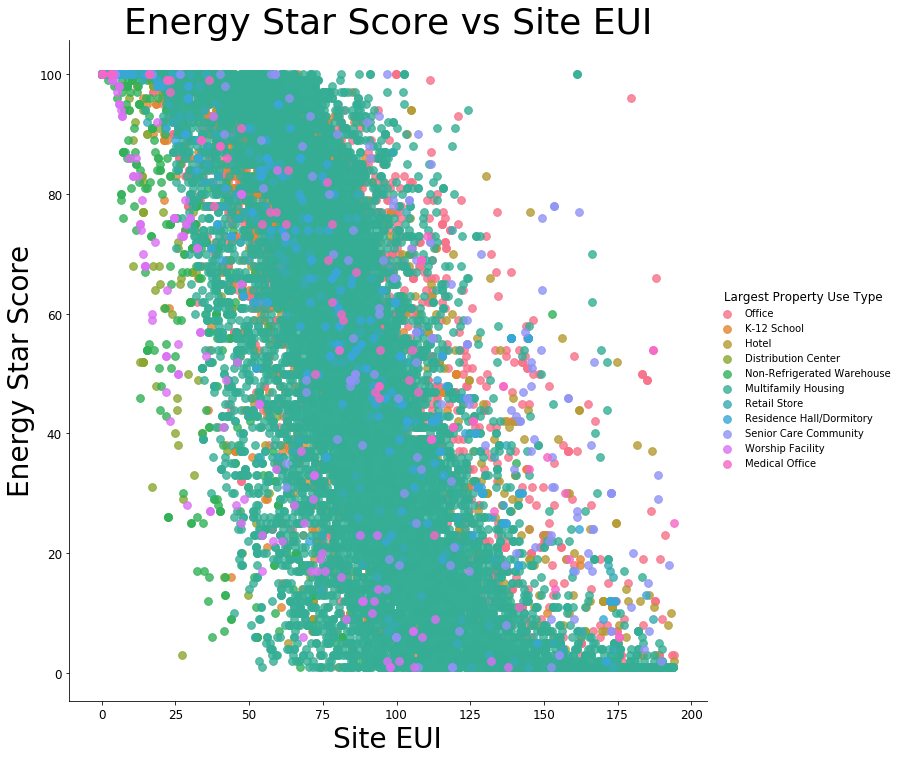

In [22]:
# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = [star])['Largest Property Use Type']

# Limit to building types with more than 50 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', star, 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 10, aspect = 1.0);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

In [23]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x[star]
    x = x.drop(columns = [star])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x[star] = y
               
    return x

In [24]:
features = remove_collinear_features(features, 0.6)

In [25]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(24549, 87)

check for columns dtypes in order to be sure that everything is in good condition for ml-algorithms

In [26]:
features.get_dtype_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


int64       6
float64     7
uint8      73
object      1
dtype: int64

In [27]:
filteredColumns = features.dtypes[features.dtypes == np.object]
obj_col=filteredColumns.index
print(obj_col)
for i in range(len(obj_col)):
    features.drop(columns=[obj_col[i]], inplace=True)

Index(['Largest Property Use Type'], dtype='object')


In [28]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features[star].isna()]
score = features[features[star].notnull()]

print(no_score.shape)
print(score.shape)

(0, 86)
(24549, 86)


Stratify the data on 'ENERGY STAR Score':

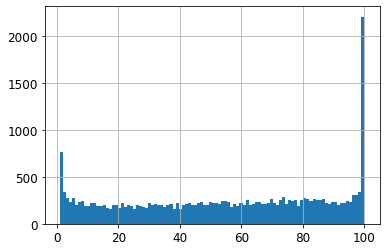

In [29]:
score[star].hist(bins=100)

In [30]:
# Stratification helper
score['star_cat'] = pd.cut(score[star],
                               bins=[0., 20., 45., 70., 90., np.inf],
                               labels=[1, 2, 3, 4, 5])

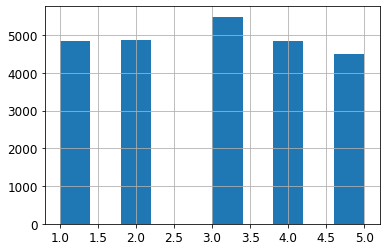

In [31]:
# Separate out the features and targets
features = score.drop(columns=star)
targets = pd.DataFrame(score[star])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(features, targets, 
                                        test_size = 0.3, random_state = 4711, stratify = features['star_cat'])


features['star_cat'].hist()

In [32]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(17184, 86)
(7365, 86)
(17184, 1)
(7365, 1)


In [33]:
def rp_cat_proportions(data):
    return data['star_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(features, test_size=0.3, random_state=4711)

compare_props = pd.DataFrame({
    "Overall": rp_cat_proportions(features),
    "Stratified": rp_cat_proportions(X_test),
    "Random": rp_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [34]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.197401,0.197420,0.199593,1.110202,0.009683
2,0.197971,0.197963,0.196334,-0.827085,-0.004073
3,0.223390,0.223354,0.224440,0.470014,-0.016229
4,0.197686,0.197692,0.196877,-0.409304,0.002795
5,0.183551,0.183571,0.182756,-0.433113,0.010721


In [35]:
X.drop(columns=['star_cat'],inplace=True)
X_test.drop(columns=['star_cat'],inplace=True)
print(X.shape)
print(X_test.shape)

(17184, 85)
(7365, 85)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
no_score.to_csv(CLEAREDDATA_PATH+'/NYC_building_energy_data_no_score.csv', index = False)
X.to_csv(CLEAREDDATA_PATH+'/NYC_building_energy_data_training_features.csv', index = False)
X_test.to_csv(CLEAREDDATA_PATH+'/NYC_building_energy_data_testing_features.csv', index = False)
y.to_csv(CLEAREDDATA_PATH+'/NYC_building_energy_data_training_labels.csv', index = False)
y_test.to_csv(CLEAREDDATA_PATH+'/NYC_building_energy_data_testing_labels.csv', index = False)

In [37]:
np.any(np.isnan(X))

True

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_tr = num_pipeline.fit_transform(X)
X_test_tr = num_pipeline.fit_transform(X_test)
X_tr

array([[ 1.38787835, -1.06926239, -0.18923331, ...,  0.        ,
        -0.06665108,  0.        ],
       [-0.09337197,  0.70741156,  1.50195519, ...,  0.        ,
        -0.06665108,  0.        ],
       [ 0.11604033,  1.02739654, -1.07774329, ...,  0.        ,
        -0.06665108,  0.        ],
       ...,
       [-0.27185629, -1.15925524,  0.64671844, ...,  0.        ,
        -0.06665108,  0.        ],
       [-0.37970512, -0.97587993,  0.6447217 , ...,  0.        ,
        -0.06665108,  0.        ],
       [ 1.04328088,  1.18818584,  1.5571044 , ...,  0.        ,
        -0.06665108,  0.        ]])

In [39]:
np.any(np.isnan(X_tr))

False

In [40]:
X_tr.shape

(17184, 85)

### Try firstly a linear regressor

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #no random_state to pass
lin_reg.fit(X_tr,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

few examples just to show

In [42]:
some_data = X.iloc[:5]
some_labels = y.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels[star]))

Predictions: [[7.23076350e+08]
 [7.23076367e+08]
 [7.23076331e+08]
 [7.23076339e+08]
 [1.76144019e+09]]
Labels: [39.0, 64.0, 4.0, 31.0, 87.0]


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

X_pred = lin_reg.predict(X_tr)
lin_mse = mean_squared_error(y, X_pred)
lin_rmse = np.sqrt(lin_mse)
print('RSME Linear Regressor for model data: %f' % (lin_rmse))
lin_r2 = r2_score(y, X_pred)
print('R2 Linear Regressor for model data: %f' % (lin_r2))

RSME Linear Regressor for model data: 18.055477
R2 Linear Regressor for model data: 0.680606


In [44]:
X_test_pred = lin_reg.predict(X_test_tr)
lin_test_mse = mean_squared_error(y_test, X_test_pred)
lin_test_rmse = np.sqrt(lin_test_mse)
print('RSME Linear Regressor for test data: %f' % (lin_test_rmse))
lin_test_r2 = r2_score(y_test, X_test_pred)
print('R2 Linear Regressor for test data: %f' % (lin_test_r2))

RSME Linear Regressor for test data: 11273678158.569447
R2 Linear Regressor for test data: -124598036981635408.000000


Uff, that's bad...

### Other regressors for prelim. comparison

In [45]:
from sklearn.svm import SVR #Support Vector Regression

svm_reg = SVR(kernel="linear") #no random_state to pass
svm_reg.fit(X_tr,y)
X_pred = svm_reg.predict(X_tr)
svm_mse = mean_squared_error(y, X_pred)
svm_rmse = np.sqrt(svm_mse)
print('RSME Linear Support Vector Regression for model data: %f' % (svm_rmse))
svm_r2 = r2_score(y, X_pred)
print('R2 Linear Support Vector Regression for model data: %f' % (svm_r2))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RSME Linear Support Vector Regression for model data: 18.765940
R2 Linear Support Vector Regression for model data: 0.654975


In [46]:
X_test_pred = svm_reg.predict(X_test_tr)
svm_test_mse = mean_squared_error(y_test, X_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)
print('RSME Linear Support Vector Regression for test data: %f' % (svm_test_rmse))
svm_test_r2 = r2_score(y_test, X_test_pred)
print('R2 Linear Support Vector Regression for test data: %f' % (svm_test_r2))

RSME Linear Support Vector Regression for test data: 18.583634
R2 Linear Support Vector Regression for test data: 0.661436


In [47]:
print("Predictions:", svm_reg.predict(some_data_prepared))
print("Labels:", list(some_labels[star]))

Predictions: [47.89892982 67.60714146 27.01037551 34.75523221 91.06570163]
Labels: [39.0, 64.0, 4.0, 31.0, 87.0]


In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=4711)
tree_reg.fit(X_tr,y)
X_pred = tree_reg.predict(X_tr)
tree_mse = mean_squared_error(y, X_pred)
tree_rmse = np.sqrt(tree_mse)
print('RSME Decission Tree Regressor for model data: %f' % (tree_rmse))
tree_r2 = r2_score(y, X_pred)
print('R2 Decission Tree Regressor for model data: %f' % (tree_r2))

RSME Decission Tree Regressor for model data: 0.000000
R2 Decission Tree Regressor for model data: 1.000000


perfect! but for sure overfitted!!!
let's see...

In [49]:
X_test_pred = tree_reg.predict(X_test_tr)
tree_test_mse = mean_squared_error(y_test, X_test_pred)
tree_test_rmse = np.sqrt(tree_test_mse)
print('RSME Decission Tree Regressor for test data: %f' % (tree_test_rmse))
tree_test_r2 = r2_score(y_test, X_test_pred)
print('R2 Decission Tree Regressor for test data: %f' % (tree_test_r2))

RSME Decission Tree Regressor for test data: 16.811995
R2 Decission Tree Regressor for test data: 0.722912


In [50]:
print("Predictions:", tree_reg.predict(some_data_prepared))
print("Labels:", list(some_labels[star]))

Predictions: [53. 90.  2. 46. 96.]
Labels: [39.0, 64.0, 4.0, 31.0, 87.0]


Regularization

In [51]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=4711)
tree_reg2.fit(X_tr,y)
X_pred2 = tree_reg2.predict(X_tr)
tree_mse2 = mean_squared_error(y, X_pred2)
tree_rmse2 = np.sqrt(tree_mse2)
print('RSME Decission Tree Regressor Reg1 for model data: %f' % (tree_rmse2))
tree_r2_2 = r2_score(y, X_pred2)
print('R2 Decission Tree Regressor Reg1 for model data: %f' % (tree_r2_2))

RSME Decission Tree Regressor Reg1 for model data: 16.771351
R2 Decission Tree Regressor Reg1 for model data: 0.724421


In [52]:
X_test_pred2 = tree_reg2.predict(X_test_tr)
tree_test_mse2 = mean_squared_error(y_test, X_test_pred2)
tree_test_rmse2 = np.sqrt(tree_test_mse2)
print('RSME Decission Tree Regressor Reg1 for test data: %f' % (tree_test_rmse2))
tree_test_r2_2 = r2_score(y_test, X_test_pred2)
print('R2 Decission Tree Regressor Reg1 for test data: %f' % (tree_test_r2_2))

RSME Decission Tree Regressor Reg1 for test data: 16.826394
R2 Decission Tree Regressor Reg1 for test data: 0.722437


In [53]:
print("Predictions:", tree_reg2.predict(some_data_prepared))
print("Labels:", list(some_labels[star]))

Predictions: [44.55762082 60.76064815 19.62283585 19.62283585 82.51749664]
Labels: [39.0, 64.0, 4.0, 31.0, 87.0]


In [54]:
tree_reg3 = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=3, random_state=4711)
tree_reg3.fit(X_tr,y)
X_pred3 = tree_reg3.predict(X_tr)
tree_mse3 = mean_squared_error(y, X_pred3)
tree_rmse3 = np.sqrt(tree_mse3)
print('RSME Decission Tree Regressor Reg2 for model data: %f' % (tree_rmse3))
tree_r2_3 = r2_score(y, X_pred3)
print('R2 Decission Tree Regressor Reg2 for model data: %f' % (tree_r2_3))

RSME Decission Tree Regressor Reg2 for model data: 21.108418
R2 Decission Tree Regressor Reg2 for model data: 0.563463


In [55]:
X_test_pred3 = tree_reg3.predict(X_test_tr)
tree_test_mse3 = mean_squared_error(y_test, X_test_pred3)
tree_test_rmse3 = np.sqrt(tree_test_mse3)
print('RSME Decission Tree Regressor Reg2 for test data: %f' % (tree_test_rmse3))
tree_test_r2_3 = r2_score(y_test, X_test_pred3)
print('R2 Decission Tree Regressor Reg2 for test data: %f' % (tree_test_r2_3))

RSME Decission Tree Regressor Reg2 for test data: 20.815585
R2 Decission Tree Regressor Reg2 for test data: 0.575227


In [56]:
print("Predictions:", tree_reg3.predict(some_data_prepared))
print("Labels:", list(some_labels[star]))

Predictions: [34.53394535 66.51061453 34.53394535 34.53394535 90.98347498]
Labels: [39.0, 64.0, 4.0, 31.0, 87.0]


### Tune more

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg2, X_tr, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [17.78772215 17.25076735 17.22487617 17.48370876 16.55122748 16.70882024
 17.30370198 16.84767898 17.40466781 16.63211432]
Mean: 17.119528525263355
Standard deviation: 0.3906121023790503


In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=4711)
forest_reg.fit(X_tr, y)
X_pred = forest_reg.predict(X_tr)
forest_mse = mean_squared_error(y, X_pred)
forest_rmse = np.sqrt(forest_mse)
print('RSME Random Forest Regressor for test data: %f' % (forest_rmse))
forest_r2 = r2_score(y, X_pred)
print('R2 Random Forest Regressor for test data: %f' % (forest_r2))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RSME Random Forest Regressor for test data: 4.002172
R2 Random Forest Regressor for test data: 0.984307


In [60]:
X_test_pred = tree_reg.predict(X_test_tr)
forest_test_mse = mean_squared_error(y_test, X_test_pred)
forest_test_rmse = np.sqrt(forest_test_mse)
print('RSME Random Forest Regressor for test data: %f' % (forest_test_rmse))
forest_test_r2 = r2_score(y_test, X_test_pred)
print('R2 Random Forest Regressor for test data: %f' % (forest_test_r2))

RSME Random Forest Regressor for test data: 16.811995
R2 Random Forest Regressor for test data: 0.722912


In [61]:
print("Predictions:", forest_reg.predict(some_data_prepared))
print("Labels:", list(some_labels[star]))

Predictions: [48.4  70.71 10.97 25.66 86.79]
Labels: [39.0, 64.0, 4.0, 31.0, 87.0]


In [62]:
scores = cross_val_score(forest_reg, X_tr, y,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

Scores: [11.29372792 10.81718705 11.07198151 11.14280659 10.61026116]
Mean: 10.987192844553695
Standard deviation: 0.2434534727259379


In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30, 100], 'max_features': [4, 8, 16, 32]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [30, 100], 'max_features': [8, 16, 32]},
  ]

forest_reg = RandomForestRegressor(random_state=4711)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_tr, y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d a

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=4711,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [4, 8, 16, 32]

In [64]:
grid_best_est=grid_search.best_estimator_
grid_search.best_params_

{'bootstrap': False, 'max_features': 32, 'n_estimators': 100}

In [65]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

12.932893994608019 {'max_features': 4, 'n_estimators': 10}
12.234772451877562 {'max_features': 4, 'n_estimators': 30}
11.933536067428074 {'max_features': 4, 'n_estimators': 100}
12.520238126738358 {'max_features': 8, 'n_estimators': 10}
11.861278840341209 {'max_features': 8, 'n_estimators': 30}
11.525942135684206 {'max_features': 8, 'n_estimators': 100}
11.705219429587206 {'max_features': 16, 'n_estimators': 10}
11.230111728063434 {'max_features': 16, 'n_estimators': 30}
11.08021396738572 {'max_features': 16, 'n_estimators': 100}
11.498450299397286 {'max_features': 32, 'n_estimators': 10}
11.073012397666053 {'max_features': 32, 'n_estimators': 30}
10.92261209676029 {'max_features': 32, 'n_estimators': 100}
11.273247353666928 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}
11.051066167074742 {'bootstrap': False, 'max_features': 8, 'n_estimators': 100}
10.876885754229361 {'bootstrap': False, 'max_features': 16, 'n_estimators': 30}
10.689953248497517 {'bootstrap': False, 'max_

In [66]:
from scipy.stats import binom

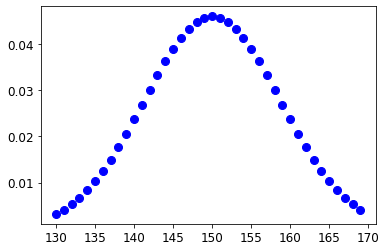

In [67]:
fig, ax = plt.subplots(1, 1)
n, p = 300, 0.5
x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')

In [83]:
#from scipy.stats import binom #expon, reciprocal, 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': binom(n=300, p=0.5),
        'bootstrap': [False], 
        'max_features': randint(low=16, high=40),
    }

#forest_reg = RandomForestRegressor(n_estimators=200, max_leaf_nodes=50, bootstrap=False, n_jobs=-1, random_state=4711)
forest_reg = RandomForestRegressor(n_jobs=-1, random_state=4711)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=4711)
rnd_search.fit(X_tr, y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state...


In [84]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

10.612149457181562 {'bootstrap': False, 'max_features': 20, 'n_estimators': 143}
10.65371538709594 {'bootstrap': False, 'max_features': 35, 'n_estimators': 150}
10.615658453758721 {'bootstrap': False, 'max_features': 27, 'n_estimators': 156}
10.616524598885805 {'bootstrap': False, 'max_features': 27, 'n_estimators': 160}
10.671174072999834 {'bootstrap': False, 'max_features': 16, 'n_estimators': 152}
10.649366999487977 {'bootstrap': False, 'max_features': 37, 'n_estimators': 159}
10.67176903024423 {'bootstrap': False, 'max_features': 16, 'n_estimators': 150}
10.617894920339639 {'bootstrap': False, 'max_features': 34, 'n_estimators': 153}
10.619636096560239 {'bootstrap': False, 'max_features': 22, 'n_estimators': 157}
10.659481192727176 {'bootstrap': False, 'max_features': 36, 'n_estimators': 147}


In [85]:
rnd_best_est=rnd_search.best_estimator_
rnd_search.best_params_

{'bootstrap': False, 'max_features': 20, 'n_estimators': 143}

In [86]:
X_test_pred = rnd_best_est.predict(X_test_tr)
forest_test_mse = mean_squared_error(y_test, X_test_pred)
forest_test_rmse = np.sqrt(forest_test_mse)
print('RSME random grid Random Forest for test data: %f' % (forest_test_rmse))
forest_test_r2 = r2_score(y_test, X_test_pred)
print('R2 random grid Random Forest for test data: %f' % (forest_test_r2))

RSME random grid Random Forest for test data: 11.825589
R2 random grid Random Forest for test data: 0.862904


In [87]:
print("Predictions:", rnd_search.predict(some_data_prepared))
print("Labels:", list(some_labels[star]))

Predictions: [46.86013986 67.11188811  8.61538462 27.4965035  84.67832168]
Labels: [39.0, 64.0, 4.0, 31.0, 87.0]


In [100]:
imp=pd.DataFrame([X.keys(), rnd_best_est.feature_importances_],index=['feature name', 'rel. feature importance']).T
impsort=imp.sort_values(by=['rel. feature importance'],ascending=False)
impsort.head()

,feature name,rel. feature importance
7,Source EUI (kBtu/ft²),0.411563
8,Weather Normalized Source EUI (kBtu/ft²),0.269945
0,Order,0.0437525
9,Natural Gas Use (kBtu),0.0372777
3,Self-Reported Gross Floor Area (ft²),0.0360257


### Try a boosting just to see

In [110]:
from sklearn.ensemble import AdaBoostRegressor

param_distribs = {
        'n_estimators': binom(n=300, p=0.5)
    }

b_forest_reg = AdaBoostRegressor(base_estimator=forest_reg,n_estimators=forest_reg.n_estimators,random_state=4711)
b_rnd_search = RandomizedSearchCV(b_forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=4711)
b_rnd_search.fit(X_tr, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/fo

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/fo

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

KeyboardInterrupt: 

In [ ]:
X_test_pred = b_rnd_search.best_estimator_.predict(X_test_tr)
rnd_ada_test_mse = mean_squared_error(y_test, X_test_pred)
rnd_ada_test_rmse = np.sqrt(rnd_ada_test_mse)
print('RSME random grid AdaBoost Random Forest for test data: %f' % (rnd_ada_test_rmse))
rnd_ada_test_r2 = r2_score(y_test, X_test_pred)
print('R2 random grid AdaBoostRandom Forest for test data: %f' % (rnd_ada_test_r2))